<a href="https://colab.research.google.com/github/bantee-sharma/dog-cat-classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def preprocess(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

In [10]:
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [11]:
import matplotlib.pyplot as plt

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid'))

model.add(Conv2D(132,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 76ms/step - accuracy: 0.5604 - loss: 0.7202 - val_accuracy: 0.7328 - val_loss: 0.5501
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - accuracy: 0.7347 - loss: 0.5327 - val_accuracy: 0.7642 - val_loss: 0.5402
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8131 - loss: 0.4090 - val_accuracy: 0.8008 - val_loss: 0.4573
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 71ms/step - accuracy: 0.8773 - loss: 0.2799 - val_accuracy: 0.7988 - val_loss: 0.6475
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.9391 - loss: 0.1519 - val_accuracy: 0.8002 - val_loss: 0.8217


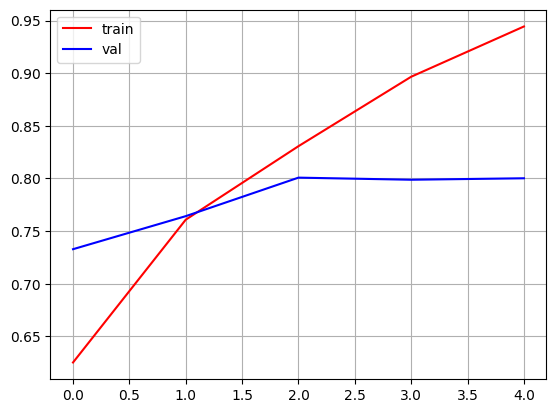

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.grid()
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img = cv2.imread('/content/54369563e20e94dcab5fc7f40cf7e8d6.webp')

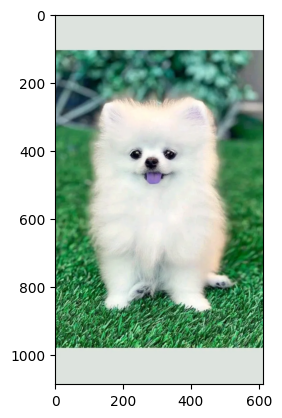

In [20]:
plt.imshow(test_img)

In [22]:
test_img.shape

(1088, 612, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


array([[1.]], dtype=float32)

In [31]:
img = cv2.imread('/content/GettyImages-936176546.webp')

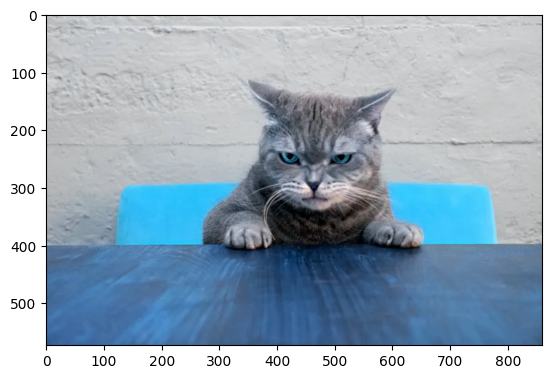

In [32]:
plt.imshow(img)

In [33]:
img.shape

(573, 860, 3)

In [35]:
img = cv2.resize(img,(256,256))

In [36]:
img = img.reshape((1,256,256,3))

In [37]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)